Generar imagenes
https://www.youtube.com/watch?v=C5Jkgvw-Z6E

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import math

Define tamaños

In [ ]:
ROWS = 1001
COLUMNS = 1001
matrix_shape=(ROWS,COLUMNS,1)

Define matrix

In [ ]:
data = np.zeros(matrix_shape, dtype=np.uint32)

Dfine centers

In [ ]:
centers = [[500,500],[200,800],[800,200]]#, [200,200], [800,800], [500,800], [800,500], [200,500], [500,200]]

In [ ]:
centers = centers #+ borders

Init centers

In [ ]:
for c in centers:
  data[c[0]][c[1]] = [255]

Calcular distancia al cenrtro

In [ ]:
center_distance_matrix = np.zeros(matrix_shape, dtype=np.uint32)

In [ ]:
for row in range(len(data)):
  for col in range(len(data[0])):
    distances = []
    for c in centers:
      d = math.sqrt(math.pow(row-c[0],2)+math.pow(col-c[1],2))
      distances.append(d)
    center_distance_matrix[row][col] = min(distances)

In [ ]:
center_distance_matrix.max()

707

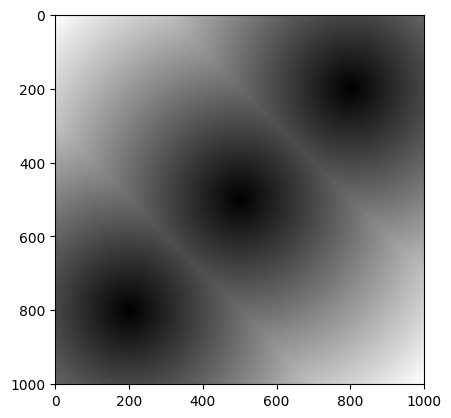

In [ ]:
plt.imshow(center_distance_matrix, cmap='gray')
plt.show()

Calcular distancia al borde 1

In [ ]:
border_distance_matrix = np.zeros(matrix_shape, dtype=np.uint32)

In [ ]:
for row in range(int(len(border_distance_matrix)/2+1)):
  for col in range(int(len(border_distance_matrix[0])/2+1)):
    d=min(row,col)
    border_distance_matrix[row][col]= d
    border_distance_matrix[ROWS-1-row][COLUMNS-1-col]=d
    border_distance_matrix[row][COLUMNS-1-col]=d
    border_distance_matrix[ROWS-1-row][col]=d


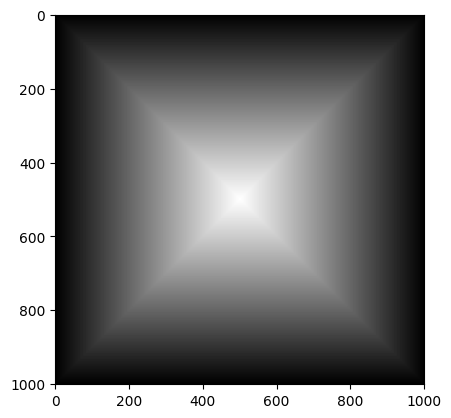

In [ ]:
plt.imshow(border_distance_matrix, cmap='gray')
plt.show()

Generacion de gradiente

In [ ]:
gradient_matrix = np.zeros(matrix_shape, dtype=np.uint32)

In [ ]:
for row in range(len(data)):
  for col in range(len(data[0])):
    #255 es el valor mas alto pero se podria contemplar jugar con la profundidad de los centros
    gradient_matrix[row][col] = (255*center_distance_matrix[row][col])/(center_distance_matrix[row][col]+border_distance_matrix[row][col])

In [ ]:
gradient_matrix[5][5]

array([253], dtype=uint32)

In [ ]:
gradient_matrix[3][3]

array([253], dtype=uint32)

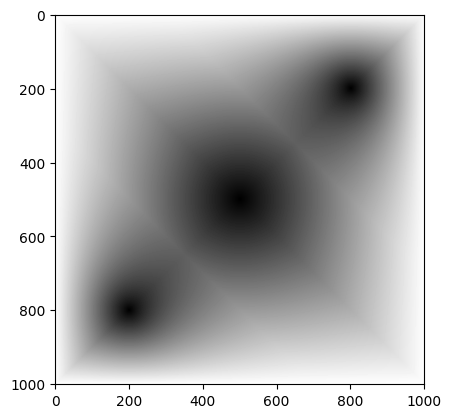

In [ ]:
plt.imshow(gradient_matrix, cmap='gray')
plt.show()

Puede que la distancia a los bordes este haciendo una aberracion en el resultado final del gradiente

Calcular velocidad

http://www.sc.ehu.es/sbweb/fisica3/cinematica/rectilineo/rectilineo_lab.html#:~:text=Poniendo%20en%20el%20eje%20de,la%20velocidad%20v%3Dp1.

como se v a repartir la fuerza
^a+1 = Total sacar porcentage de ^a y de 1 el porcentage ^a sera la aceleracion aplicable

La velocidad podra ser positiva o negativa indicando asi la direccion

Podemos sacar dos matrices con las aceleraciones la de x  las de y a partir de la matriz graiente

Hay que aplicar la inversa de la aceleracion y restarla

ACCEL X

In [ ]:
acel_x_matrix = np.zeros(matrix_shape, dtype=np.float128)

In [ ]:
for row in range(len(acel_x_matrix)-1):
  for col in range(len(acel_x_matrix[0])):
    total = float(gradient_matrix[row+1][col][0])-float(gradient_matrix[row][col][0])
    acel_x_matrix[row][col][0]=total/-255


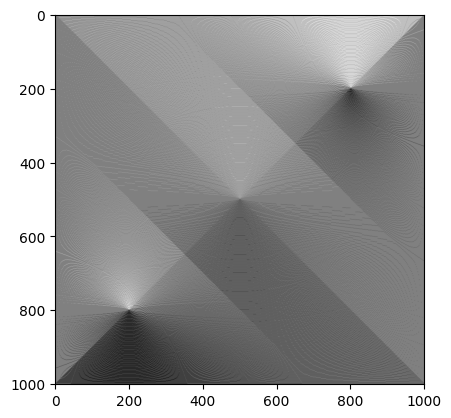

In [ ]:
plt.imshow(acel_x_matrix, cmap='gray')
plt.show()

Matriz de rozamiento

In [ ]:
roz_x_matrix = np.zeros(matrix_shape, dtype=np.float128)

In [ ]:
for row in range(len(roz_x_matrix)-1):
  for col in range(len(roz_x_matrix[0])):
    a = np.abs(acel_x_matrix[row][col][0])
    roz_x_matrix[row][col][0] = (1-a)*0.9

ACCEL Y

In [ ]:
acel_y_matrix = np.zeros(matrix_shape, dtype=np.float128)

In [ ]:
for row in range(len(acel_y_matrix)):
  for col in range(len(acel_y_matrix[0])-1):
    total = float(gradient_matrix[row][col+1][0])-float(gradient_matrix[row][col][0])
    acel_y_matrix[row][col][0]=total/-255

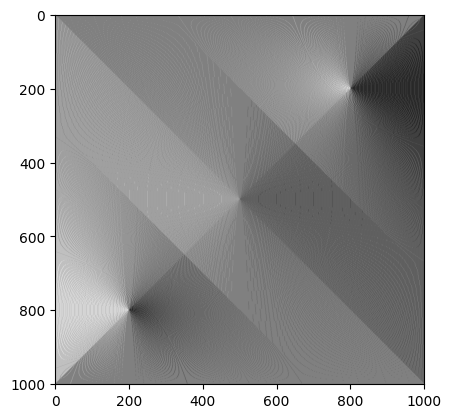

In [ ]:
plt.imshow(acel_y_matrix, cmap='gray')
plt.show()

Matriz de rozamiento

In [ ]:
roz_y_matrix = np.zeros(matrix_shape, dtype=np.float128)

In [ ]:
for row in range(len(roz_y_matrix)):
  for col in range(len(roz_y_matrix[0])-1):
    a = np.abs(acel_y_matrix[row][col][0])
    roz_y_matrix[row][col][0] = (1-a)*0.9


Calcular

y=y+v*t+1/2*a*t^2

In [ ]:
px=450
py=220
vy = 0
vx = 0
path = []
for i in range(175000):
  if vy<0:
      py=py+vy+0.5*(acel_y_matrix[int(px)][int(py)]+roz_y_matrix[int(px)][int(py)])
  else:
      py=py+vy+0.5*(acel_y_matrix[int(px)][int(py)]+roz_y_matrix[int(px)][int(py)])

  if vx<0:
      px=px+vx+0.5*(acel_x_matrix[int(px)][int(py)]+roz_x_matrix[int(px)][int(py)])
  else:
      px=px+vx+0.5*(acel_x_matrix[int(px)][int(py)]+roz_x_matrix[int(px)][int(py)])

  vy+=acel_y_matrix[int(px)][int(py)]
  vx+=acel_x_matrix[int(px)][int(py)]

  path.append([px[0],py[0]])


In [ ]:
print(px,py,vx,vy)

[200.13745098] [800.40078431] [-0.43529412] [-0.41960784]


In [ ]:
path_matrix = np.zeros(matrix_shape, dtype=np.float128)

In [ ]:
for pix in path:
  path_matrix[int(pix[0])][int(pix[1])]=255

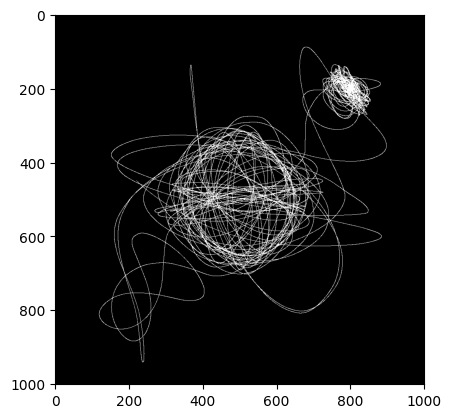

In [ ]:
plt.imshow(path_matrix, cmap='gray')
plt.show()